# Tutorial: Energy Densities of the Photon Targets

In this tutorial we will examine the integrated energy densities, $u [{\rm erg}\,{\rm cm}^{-3}]$, produced by the different photon fields that can be subject to inverse Compton scattering.

In [1]:
import numpy as np
import astropy.units as u
from astropy.constants import M_sun
from astropy.coordinates import Distance
import matplotlib.pyplot as plt

In [2]:
from agnpy.targets import SSDisk, SphericalShellBLR, RingDustTorus, PointSourceBehindJet
from agnpy.emission_regions import Blob
from agnpy.utils.plot import load_mpl_rc

# matplotlib adjustments
load_mpl_rc()
u_label = r"$u\,/\,{\rm erg}\,{\rm cm}^{-3}$"
u_prime_label = r"$u'\,/\,{\rm erg}\,{\rm cm}^{-3}$"
r_label = r"$r\,/\,{\rm cm}$"

## Shakura Sunyeav Disk

In [3]:
M_BH = 1e9 * M_sun
L_disk = 1e46 * u.Unit("erg s-1")
eta = 1 / 12
R_tilde_in = 6
R_tilde_out = 200
disk = SSDisk(M_BH, L_disk, eta, R_tilde_in, R_tilde_out, R_g_units=True)
print(disk)

* Shakura Sunyaev accretion disk:
 - M_BH (central black hole mass): 1.99e+42 g
 - L_disk (disk luminosity): 1.00e+46 erg / s
 - eta (accretion efficiency): 8.33e-02
 - dot(m) (mass accretion rate): 1.34e+26 g / s
 - R_in (disk inner radius): 8.86e+14 cm
 - R_out (disk inner radius): 2.95e+16 cm


Let us define an array of distances over which we will calculate the integrated energy density $u$, using the `u` class function. Note that by default the energy density is computed in a stationary frame centred in the galaxy.

In [4]:
r = np.logspace(15, 21) * u.cm
u_disk = disk.u(r)

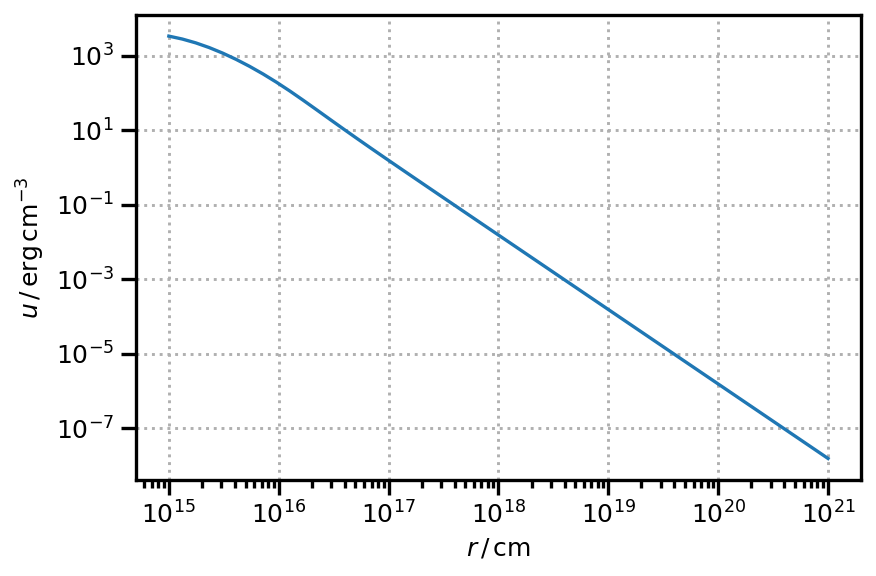

In [5]:
plt.loglog(r, u_disk)
plt.ylabel(u_label)
plt.xlabel(r_label)
plt.show()

Now let us simulate a point source behind the jet with the same luminosity as the disk. In the limit of large
distances the disk energy density should tend to the one of the point source. The point source behind the jet is monochromatic, we assume it has the same dimensionless energy of the photons emitted at the innermost disk radius.

In [6]:
ps = PointSourceBehindJet(L_disk, disk.epsilon(disk.R_in))

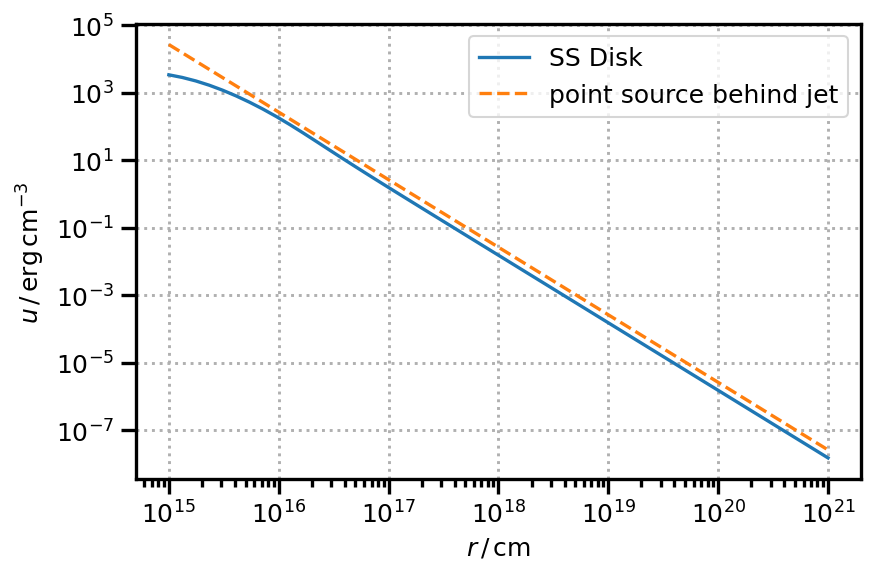

In [7]:
u_ps = ps.u(r)
plt.loglog(r, u_disk, label="SS Disk")
plt.loglog(r, u_ps, ls="--", label="point source behind jet")
plt.ylabel(u_label)
plt.xlabel(r_label)
plt.legend()
plt.show()

In [8]:
print(u_ps / u_disk)

[7.85801165 5.35802726 3.86101543 2.9391417  2.3544817  1.97504869
 1.7282203  1.57486947 1.49334643 1.4683782  1.48473886 1.52578977
 1.57544655 1.6214849  1.65763709 1.68293533 1.69930018 1.70935912
 1.71534893 1.71884834 1.72087    1.72203038 1.72269392 1.72307254
 1.72328832 1.7234112  1.72348117 1.72352098 1.72354364 1.72355656
 1.7235639  1.7235681  1.72357053 1.72357178 1.72357237 1.72357321
 1.72357429 1.72357301 1.72357778 1.72357788 1.72358868 1.7235788
 1.72357487 1.72366049 1.72355907 1.72363059 1.72388102 1.7243632
 1.72455901 1.72550876]


Let us see if also in the frame comoving with the blob the two energy densities overlap in the case of large distances. To compute the energy density in such a frame we just have to pass a `Blob` instance to the `u` function

In [9]:
# set the spectrum normalisation (total energy in electrons in this case)
spectrum_norm = 1e48 * u.Unit("erg")
# define the spectral function through a dictionary
spectrum_dict = {
    "type": "PowerLaw",
    "parameters": {"p": 2.8, "gamma_min": 1e2, "gamma_max": 1e7},
}
R_b = 1e16 * u.cm
B = 1 * u.G
z = Distance(1e27, unit=u.cm).z
delta_D = 10
Gamma = 10
blob = Blob(R_b, z, delta_D, Gamma, B, spectrum_norm, spectrum_dict)

In [10]:
u_prime_disk = disk.u(r, blob)
u_prime_ps = ps.u(r, blob)

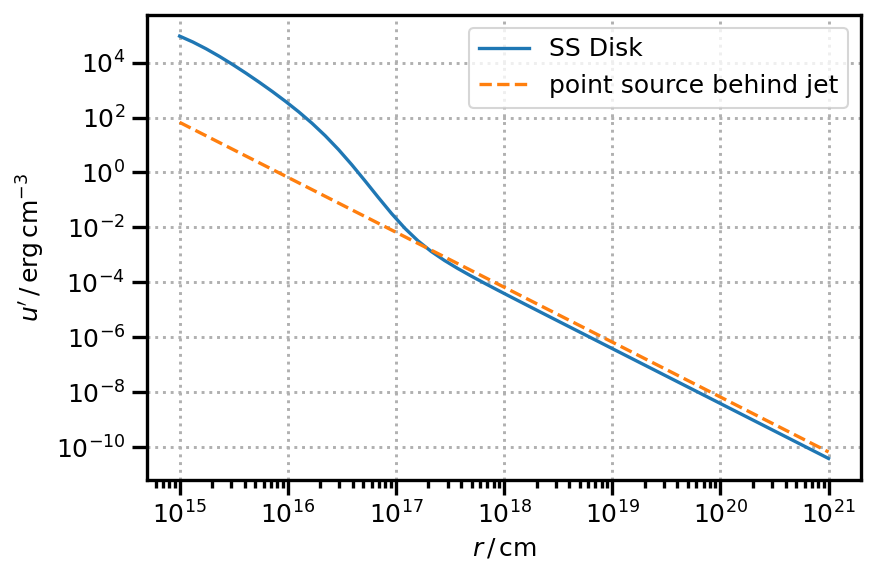

In [11]:
plt.loglog(r, u_prime_disk, label="SS Disk")
plt.loglog(r, u_prime_ps, ls="--", label="point source behind jet")
plt.ylabel(u_prime_label)
plt.xlabel(r_label)
plt.legend()
plt.show()

In [12]:
print(u_prime_ps / u_prime_disk)

[7.24996271e-04 6.75836219e-04 6.79738733e-04 7.27956039e-04
 8.19316002e-04 9.59407846e-04 1.16220110e-03 1.45574269e-03
 1.89646154e-03 2.60348267e-03 3.84227906e-03 6.23569686e-03
 1.13094739e-02 2.28829563e-02 5.03108983e-02 1.14302102e-01
 2.50322013e-01 4.89044408e-01 8.05541470e-01 1.11463257e+00
 1.35013318e+00 1.50390685e+00 1.59678439e+00 1.65097757e+00
 1.68214768e+00 1.69996950e+00 1.71013345e+00 1.71592336e+00
 1.71921978e+00 1.72109605e+00 1.72216381e+00 1.72277144e+00
 1.72311723e+00 1.72331385e+00 1.72342561e+00 1.72348971e+00
 1.72352678e+00 1.72354598e+00 1.72356240e+00 1.72356913e+00
 1.72358370e+00 1.72357597e+00 1.72357326e+00 1.72365957e+00
 1.72355855e+00 1.72363029e+00 1.72388085e+00 1.72436311e+00
 1.72455896e+00 1.72550873e+00]


**Note** I think that the fact that the energy density ratio does not converge to 1 is due to the expression for the energy density of the Disk not being properly normalised with respect to the radius variable $R$. One in fact can see how, given the same luminosity, changing the external and internal radiuses of the disk will alter the value of $u$ at large distances. This should not be the case as, no matter how geometrically distributed is the luminosity, it should always reduce to the case of a point source at very large distances.

## Spherical Shell Broad Line Region
Let us compute the energy density of the BLR in the two reference frame (stationary in the galaxy and comoving with the blob) and compare it with a monochromatic point source with the same properties of the BLR.

In [13]:
blr = SphericalShellBLR(L_disk, 0.1, "Lyalpha", 1e17 * u.cm)
# point source with the same luminosity as the BLR
ps = PointSourceBehindJet(blr.xi_line * L_disk, blr.epsilon_line)

# compute the energy densities in the stationary frame
u_blr = blr.u(r)
u_ps = ps.u(r)

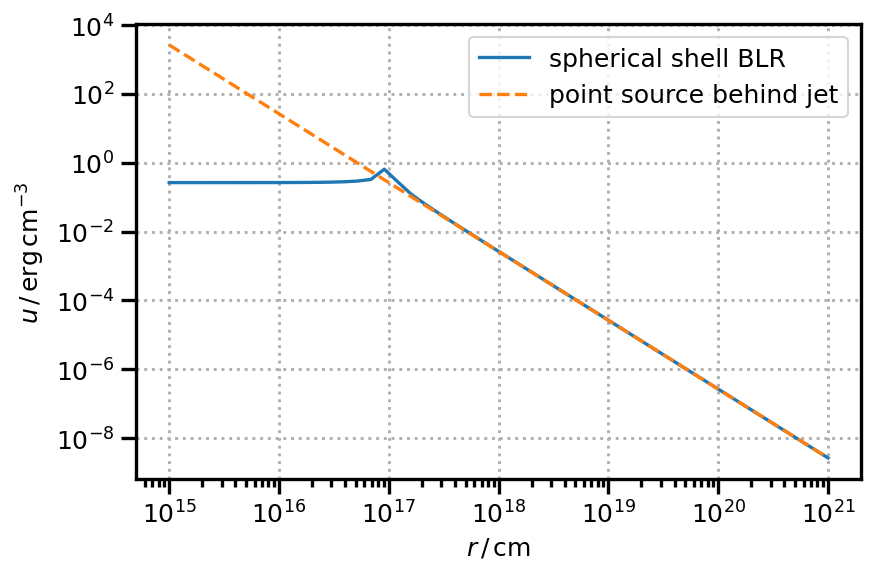

In [14]:
plt.loglog(r, u_blr, label="spherical shell BLR")
plt.loglog(r, u_ps, ls="--", label="point source behind jet")
plt.legend()
plt.ylabel(u_label, fontsize=12)
plt.xlabel(r_label, fontsize=12)
plt.show()

In [15]:
print(u_ps / u_blr)

[9.99966555e+03 5.68953157e+03 3.23712307e+03 1.84173547e+03
 1.04777860e+03 5.96027730e+02 3.38987457e+02 1.92734842e+02
 1.09518812e+02 6.21695611e+01 3.52276772e+01 1.98966731e+01
 1.11708942e+01 6.20095465e+00 3.36234834e+00 1.71704018e+00
 4.92424579e-01 6.52544426e-01 8.49304046e-01 9.20210179e-01
 9.56064946e-01 9.75421968e-01 9.86143527e-01 9.92155997e-01
 9.95549633e-01 9.97471892e-01 9.98562858e-01 9.99182710e-01
 9.99535111e-01 9.99735529e-01 9.99849534e-01 9.99914391e-01
 9.99951291e-01 9.99972286e-01 9.99984231e-01 9.99991028e-01
 9.99994895e-01 9.99997095e-01 9.99998347e-01 9.99999060e-01
 9.99999465e-01 9.99999696e-01 9.99999827e-01 9.99999901e-01
 9.99999944e-01 9.99999968e-01 9.99999982e-01 9.99999990e-01
 9.99999994e-01 9.99999997e-01]


In [16]:
# compute the energy densities in teh frame comoving with the blob
u_prime_blr = blr.u(r, blob)
u_prime_ps = ps.u(r, blob)

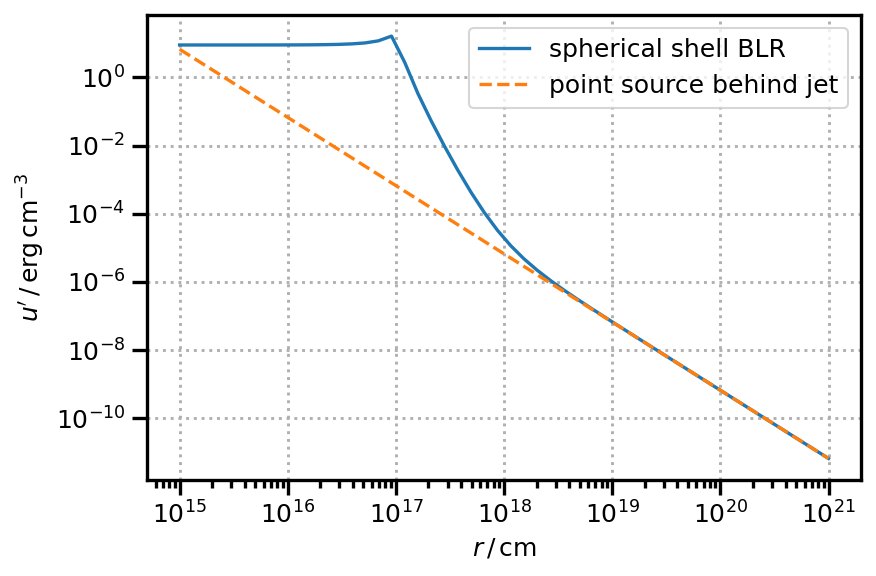

In [17]:
plt.loglog(r, u_prime_blr, label="spherical shell BLR")
plt.loglog(r, u_prime_ps, ls="--", label="point source behind jet")
plt.ylabel(u_prime_label, fontsize=12)
plt.xlabel(r_label, fontsize=12)
plt.legend()
plt.show()

In [18]:
print(u_prime_ps / u_prime_blr)

[7.50051121e-01 4.26658465e-01 2.42652464e-01 1.38052362e-01
 7.85840604e-02 4.47118260e-02 2.54121253e-02 1.44484322e-02
 8.20398993e-03 4.65578226e-03 2.63437189e-03 1.48267001e-03
 8.29252732e-04 4.56033212e-04 2.43330166e-04 1.20415861e-04
 4.97224154e-05 1.67407660e-04 7.86966258e-04 2.81307196e-03
 8.81848348e-03 2.50178988e-02 6.37094094e-02 1.41975089e-01
 2.69832566e-01 4.33708813e-01 5.99609006e-01 7.37619045e-01
 8.37120290e-01 9.02381362e-01 9.42743372e-01 9.66844893e-01
 9.80944160e-01 9.89094832e-01 9.93774672e-01 9.96451229e-01
 9.97978641e-01 9.98849175e-01 9.99344969e-01 9.99627223e-01
 9.99787871e-01 9.99879294e-01 9.99931317e-01 9.99960920e-01
 9.99977764e-01 9.99987348e-01 9.99992801e-01 9.99995904e-01
 9.99997669e-01 9.99998674e-01]


as we can see in both reference frames the energy density of the BLR tends to the one of a point source behind the jet for large enough distances.

## Ring Dust Torus
Finally let us repeat the same exercise for the Torus

In [19]:
dt = RingDustTorus(L_disk, 0.2, 1000 * u.K)
# point source approximating the torus
ps = PointSourceBehindJet(dt.xi_dt * L_disk, dt.epsilon_dt)

u_dt = dt.u(r)
u_ps = ps.u(r)

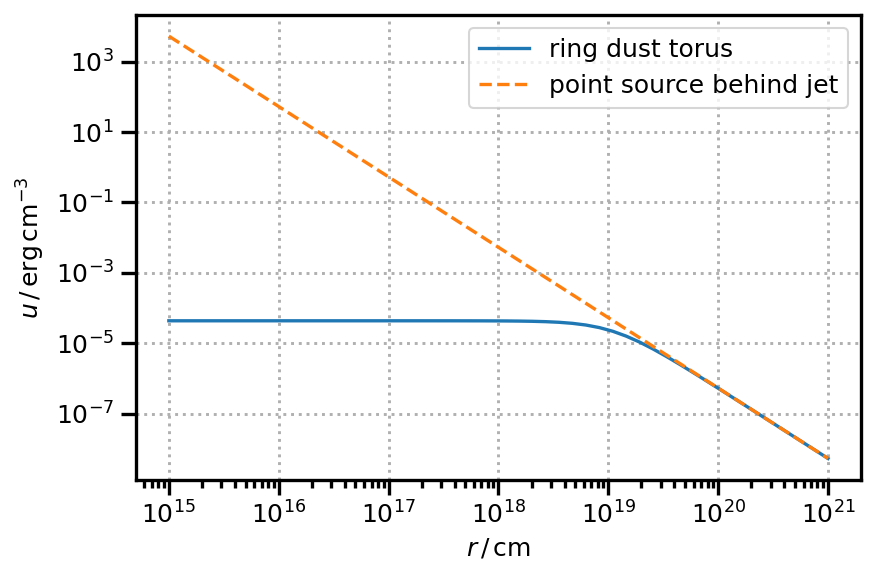

In [20]:
plt.loglog(r, u_dt, label="ring dust torus")
plt.loglog(r, u_ps, ls="--", label="point source behind jet")
plt.ylabel(u_label)
plt.xlabel(r_label)
plt.legend()
plt.show()

In [21]:
print(u_ps / u_dt)

[1.22500001e+08 6.97008599e+07 3.96588559e+07 2.25653581e+07
 1.28393869e+07 7.30543956e+06 4.15669767e+06 2.36510572e+06
 1.34571390e+06 7.65693611e+05 4.35669838e+05 2.47890732e+05
 1.41046936e+05 8.02542482e+04 4.56640231e+04 2.59826484e+04
 1.47842098e+04 8.41244835e+03 4.78700142e+03 2.72417069e+03
 1.55044764e+03 8.82614949e+02 5.02627095e+02 2.86419097e+02
 1.63399642e+02 9.34032208e+01 5.35761947e+01 3.09151504e+01
 1.80213198e+01 1.06849029e+01 6.51058002e+00 4.13544621e+00
 2.78402688e+00 2.01508740e+00 1.57757113e+00 1.32863023e+00
 1.18698620e+00 1.10639264e+00 1.06053599e+00 1.03444417e+00
 1.01959827e+00 1.01115115e+00 1.00634486e+00 1.00361014e+00
 1.00205412e+00 1.00116877e+00 1.00066501e+00 1.00037838e+00
 1.00021530e+00 1.00012250e+00]


In [22]:
# compute the energy density in the comoving frame
u_prime_dt = dt.u(r, blob)
u_prime_ps = ps.u(r, blob)

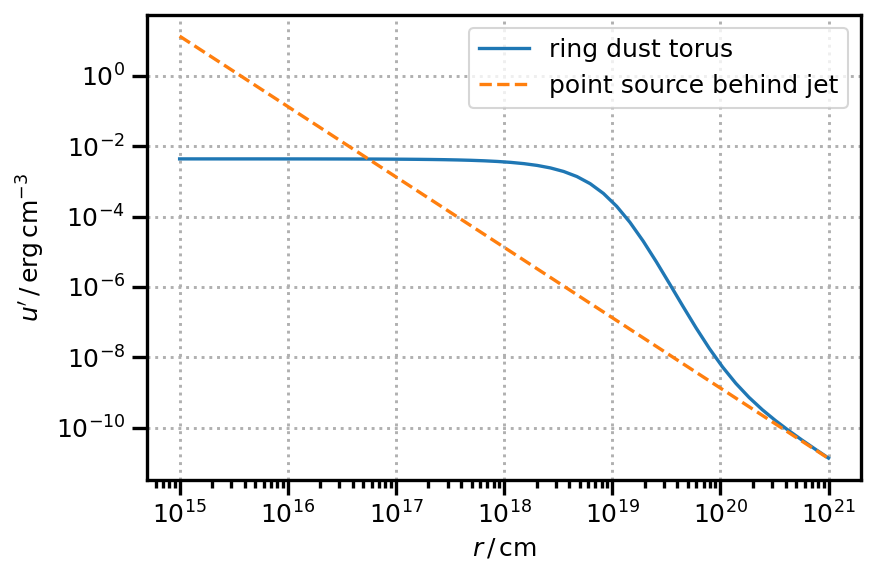

In [23]:
plt.loglog(r, u_prime_dt, label="ring dust torus")
plt.loglog(r, u_prime_ps, ls="--", label="point source behind jet")
plt.ylabel(u_prime_label)
plt.xlabel(r_label)
plt.legend()
plt.show()

In [24]:
print(u_prime_ps / u_prime_dt)

[3.07846237e+03 1.75170645e+03 9.96774906e+02 5.67209965e+02
 3.22778931e+02 1.83690133e+02 1.04542313e+02 5.95021106e+01
 3.38701973e+01 1.92824808e+01 1.09796246e+01 6.25341865e+00
 3.56276813e+00 2.03069060e+00 1.15810410e+00 6.60969241e-01
 3.77619829e-01 2.16031042e-01 1.23812644e-01 7.11331615e-02
 4.10022103e-02 2.37399287e-02 1.38291596e-02 8.12363156e-03
 4.82787915e-03 2.91642350e-03 1.80301286e-03 1.15226379e-03
 7.72470708e-04 5.54830469e-04 4.39548695e-04 3.98358689e-04
 4.29262636e-04 5.66042619e-04 9.17758068e-04 1.78403491e-03
 3.96399745e-03 9.51162503e-03 2.32872302e-02 5.51045814e-02
 1.19828715e-01 2.29816661e-01 3.80285172e-01 5.44740719e-01
 6.91764280e-01 8.04004441e-01 8.80642024e-01 9.29290594e-01
 9.58808813e-01 9.76242007e-01]


again in both reference frames the energy density of the dust torus tends to the one of a point source behind the jet with its same luminosity.